In [1]:
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

# entropy
# information gain (IG)

In [2]:
iris_train = pd.read_csv('D:/Home tasks/Datasets/train_iris.csv')
iris_test = pd.read_csv('D:/Home tasks/Datasets/test_iris.csv')
iris_test

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0
5,125,7.2,3.2,6.0,1.8,2
6,36,5.5,3.5,1.3,0.2,0
7,141,6.9,3.1,5.1,2.3,2
8,12,4.8,3.0,1.4,0.1,0
9,63,6.1,2.9,4.7,1.4,1


In [3]:
# разделяем данные на обучаемые и целевые в обоих фреймах
X_train = iris_train.drop(['Unnamed: 0', 'species'], axis=1)
X_test = iris_test.drop(['Unnamed: 0', 'species'], axis=1)
y_train = iris_train.species
y_test = iris_test.species

# случайное разделение на выборки, если исходные данные не были изначально поделены
# X_train, y_train, X_test, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=9)


In [10]:
score_data = pd.DataFrame()
max_depth_values = range(1, 101)
seed = np.random.seed(9)

for max_depth in max_depth_values:
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth,
                                                random_state=seed)
    decision_tree.fit(X_train,y_train)
    train_score = decision_tree.score(X_train, y_train)
    test_score = decision_tree.score(X_test, y_test)

    # k-fold кросс-валидация
    mean_cv_score = model_selection.cross_val_score(decision_tree, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cv_score': [mean_cv_score]})
    score_data = score_data.append(temp_score_data)

score_data

,max_depth,train_score,test_score,cv_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.92,0.96
0,5,1.00,0.92,0.96
...,...,...,...,...
0,96,1.00,0.94,0.96
0,97,1.00,0.92,0.96
0,98,1.00,0.92,0.96
0,99,1.00,0.92,0.96


In [11]:
#собираем score - колонки в одну
score_data_long = pd.melt(score_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cv_score'],
                          var_name='set_type', value_name='score')
score_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
295,96,cv_score,0.96
296,97,cv_score,0.96
297,98,cv_score,0.96
298,99,cv_score,0.96


In [12]:
clf = tree.DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

# ищем лучшую модель с помощью GridSearchCV (cv - кросс-валидация)
gsc_clf = model_selection.GridSearchCV(clf, params, cv=5)
gsc_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [14]:
# записываем лучшую модель в переменную и смотрим её лучшие параметры
best_estimator = gsc_clf.best_estimator_
gsc_clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [15]:
# смотрим результат на лучшей получившейся модели
best_estimator.score(X_test, y_test)

0.94

In [16]:
# precision и recall
print(metrics.precision_score(y_test, best_estimator.predict(X_test), average='macro'),
    metrics.recall_score(y_test, best_estimator.predict(X_test), average='macro'), sep='\n')

0.9407894736842105
0.9444444444444443


[Text(133.92000000000002, 190.26, 'X[2] <= 2.45\ngini = 0.665\nsamples = 100\nvalue = [35, 30, 35]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 1.75\ngini = 0.497\nsamples = 65\nvalue = [0, 30, 35]'),
 Text(133.92000000000002, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

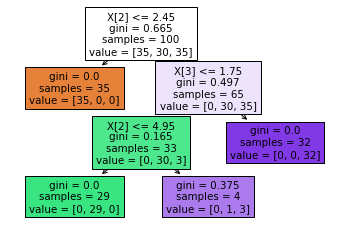

In [17]:
# визуализация дерева решений
tree.plot_tree(best_estimator, filled=True)

In [4]:
# Random Forest
rf = RandomForestClassifier()

params = {'n_estimators': range(1, 11),
          'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 30),}

gsc_clf_rf = model_selection.GridSearchCV(rf, params, cv=5)
gsc_clf_rf.fit(X_train, y_train)

best_rf = gsc_clf_rf.best_estimator_

In [6]:
# предсказать значения
predictions = best_rf.predict(X_test)

<AxesSubplot:>

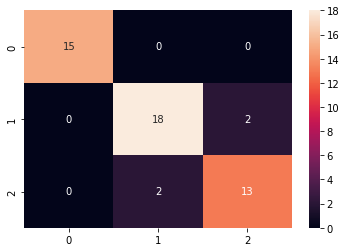

In [7]:
# Confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:xlabel='feature_importances', ylabel='features'>

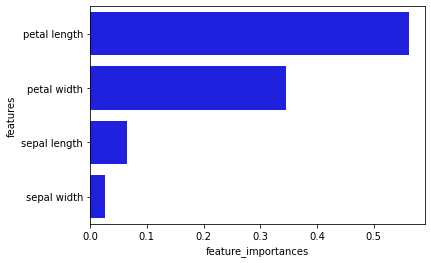

In [8]:
# меры влияния данных на обучение
fi = best_rf.feature_importances_
fi_2_df = pd.DataFrame({'features': X_train.columns,
                       'feature_importances': fi})
fi_2_df = fi_2_df.sort_values(['feature_importances'], ascending=False)
sns.barplot(x="feature_importances", y="features", data=fi_2_df,
            label="importance", color="b")